In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ruta = r"C:\Users\josue\Downloads\OECD.CTP.TPS,DSD_REV_LAC@DF_REVVEN,+..S13....A.csv"
df = pd.read_csv(ruta)

# Seleccionar columnas clave
df = df[['TIME_PERIOD', 'STANDARD_REVENUE', 'OBS_VALUE']]

# Eliminar nulos
df = df.dropna(subset=['OBS_VALUE'])


In [3]:
print(df['TIME_PERIOD'].unique())          # Años disponibles
print(df['STANDARD_REVENUE'].unique())     # Categorías de impuestos
print(df.describe())                       # Estadísticas básicas


[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
['T_5124' 'T_4320' 'T_4200' 'T_4500' 'T_5122' 'T_5128' 'T_5130' 'T_5300'
 'T_5200' 'T_5125' 'T_6000' 'T_5113' 'T_5112' 'T_4600' 'T_4100' 'T_3000'
 'T_5127' 'T_4400' 'T_6100' 'T_5121' 'T_5126' 'T_1210' 'T_5120' 'T_5111'
 '_T' 'T_1300' 'T_5110' 'T_2400' 'T_2000' 'T_1200' 'T_5123' 'T_4310'
 'T_4300' 'T_5000' 'T_1000' 'T_4000' 'T_5100' 'T_6200']
       TIME_PERIOD     OBS_VALUE
count   430.000000  4.300000e+02
mean   2012.390698  2.225983e+06
std       2.855642  1.326840e+07
min    2008.000000  0.000000e+00
25%    2010.000000  0.000000e+00
50%    2012.000000  1.459583e+03
75%    2015.000000  2.142201e+05
max    2017.000000  1.486695e+08


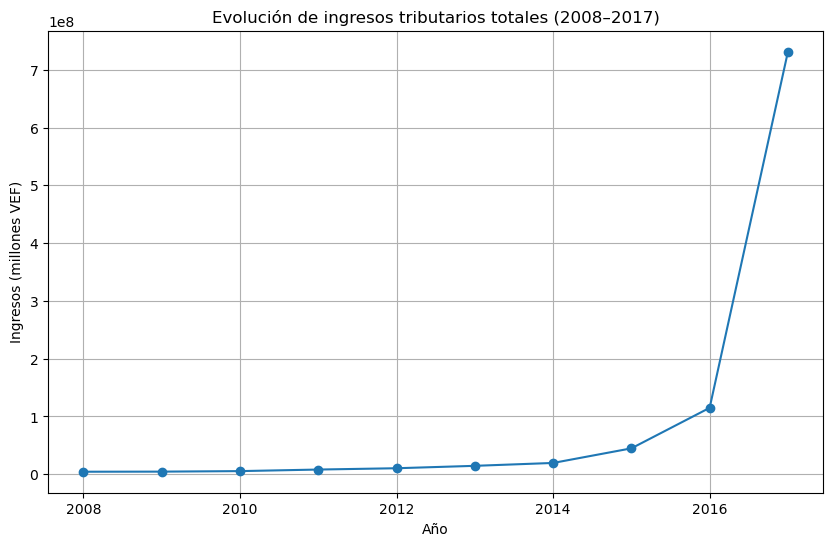

In [4]:
df_total = df.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_total['TIME_PERIOD'], df_total['OBS_VALUE'], marker='o')
plt.title('Evolución de ingresos tributarios totales (2008–2017)')
plt.xlabel('Año')
plt.ylabel('Ingresos (millones VEF)')
plt.grid(True)
plt.show()


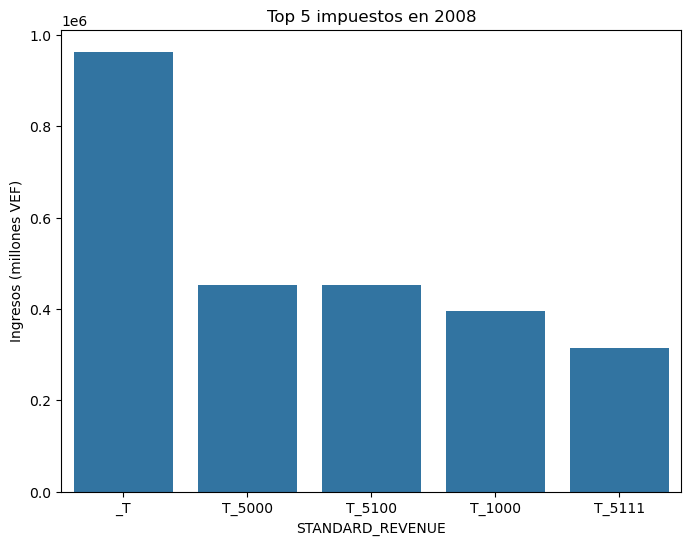

In [5]:
# Seleccionar un año, por ejemplo 2008
df_2008 = df[df['TIME_PERIOD'] == 2008].nlargest(5, 'OBS_VALUE')

plt.figure(figsize=(8,6))
sns.barplot(x='STANDARD_REVENUE', y='OBS_VALUE', data=df_2008)
plt.title('Top 5 impuestos en 2008')
plt.ylabel('Ingresos (millones VEF)')
plt.show()


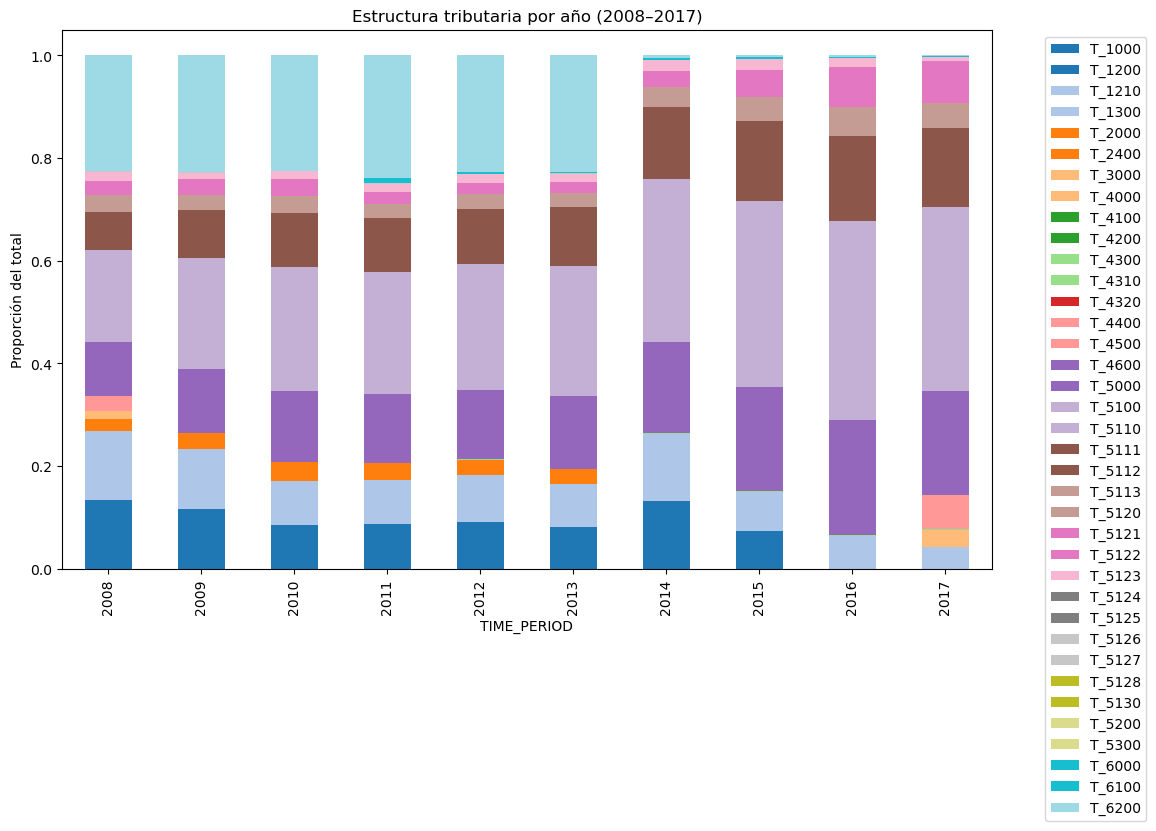

In [7]:
df_yearly = df.groupby(['TIME_PERIOD','STANDARD_REVENUE'])['OBS_VALUE'].sum().reset_index()

# Normalizar por año (proporción)
df_yearly['prop'] = df_yearly.groupby('TIME_PERIOD')['OBS_VALUE'].transform(lambda x: x / x.sum())

# Gráfico apilado
pivot = df_yearly.pivot(index='TIME_PERIOD', columns='STANDARD_REVENUE', values='prop')
pivot.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Estructura tributaria por año (2008–2017)')
plt.ylabel('Proporción del total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
